In [420]:
miguel_hidalgo_data.groupby(['Hour', 'Colonia']).size().reset_index(name='Trip_Count')

,Hour,Colonia,Trip_Count
0,0,Agricultura,140
1,0,Ampliación Granada,166
2,0,Anahuac,204
3,0,Anzures,606
4,0,Anáhuac I Sección,424
...,...,...,...
567,23,Santo Tomas,49
568,23,Tacuba,274
569,23,Tlaxpana,966
570,23,Un Hogar para Nosotros,138


In [ ]:
# Group by 'Hour' and 'Colonia' and count the number of trips
trip_count_per_hour_colonia = miguel_hidalgo_data.groupby(['Hour', 'Colonia']).size().reset_index(name='Trip_Count')

# Get the top 10 colonias for each hour by trip count
top_10_colonias_per_hour = trip_count_per_hour_colonia.groupby('Hour').apply(lambda x: x.nlargest(10, 'Trip_Count')).reset_index(drop=True)

# Create a bar chart
fig = px.bar(top_10_colonias_per_hour, x='Hour', y='Trip_Count', color='Colonia', barmode='group',
             title='Top 10 Colonias by Number of Trips per Hour in Benito Juárez',
             labels={'Hour': 'Hour of the Day', 'Trip_Count': 'Number of Trips', 'Colonia': 'Colonia'})

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='Hour of the Day',
    yaxis_title='Number of Trips',
    xaxis_tickangle=-45,
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600  # Set the height of the chart
)

# Update x-axis ticks to show all hours from 0 to 23
fig.update_xaxes(tickmode='array', tickvals=list(range(24)))

# Show the plot
fig.show()

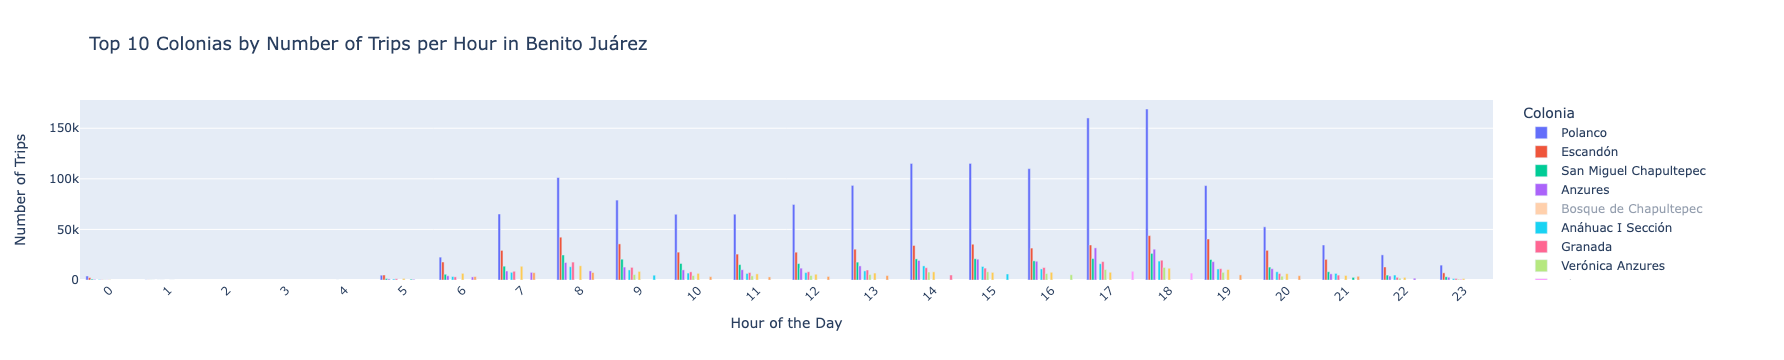

### Polanco and Escandon lead with the most trips hourly

In [ ]:
# Extract the unique colonias from the top 10 lists
top_colonias = top_10_colonias_per_hour['Colonia'].unique()

# Filter the original data to include only the top colonias
filtered_data = miguel_hidalgo_data[miguel_hidalgo_data['Colonia'].isin(top_colonias)]

# Group by 'Station_ID' and count the number of trips for each station
trip_count_per_station = filtered_data.groupby(['Station_ID', 'Colonia', 'Latitude', 'Longitude']).size().reset_index(name='Trip_Count')

# Sort the stations by trip count in descending order and select the top 15
top_15_stations = trip_count_per_station.sort_values(by='Trip_Count', ascending=False).head(15)

# Generate a color map for the top 15 stations
colors = plt.cm.get_cmap('tab20', 15).colors  # 'tab20' is a colormap with 20 colors
color_map = {station: colors[i] for i, station in enumerate(top_15_stations['Station_ID'])}
color_map_hex = {station: mcolors.rgb2hex(color) for station, color in color_map.items()}

# Create a Folium map centered at the mean latitude and longitude of the top 15 stations
mean_lat_lon = top_15_stations[['Latitude', 'Longitude']].mean()
map_center = [mean_lat_lon['Latitude'], mean_lat_lon['Longitude']]
mymap = folium.Map(location=map_center, zoom_start=14)


# Add a polygon layer for the Miguel Hidalgo boundary
folium.Polygon(
    locations=hull_coords,
    color='blue',
    fill=True,
    fill_opacity=0.2,
    weight=2,
    popup='Miguel Hidalgo Area'
).add_to(mymap)

# Add a marker for each of the top 15 stations with color based on Station_ID
for idx, row in top_15_stations.iterrows():
    folium.Marker(
        location=[row['Latitude'], row['Longitude']],
        popup=f"Station: {row['Station_ID']}<br>Colonia: {row['Colonia']}<br>Trip Count: {row['Trip_Count']}",
        icon=folium.Icon(color='blue', icon_color=color_map_hex[row['Station_ID']])
    ).add_to(mymap)

# Add a title to the map
title_html = '''
     <div style="position: fixed; 
     top: 10px; left: 60%; transform: translateX(-50%); width: auto; height: auto; 
     background-color: white; z-index:9999; font-size:22px;
     border:2px solid grey; border-radius: 10px; padding: 5px;">
     <b>Top 15 Stations with Highest Trip Counts in Miguel Hidalgo</b>
     </div>
     '''
mymap.get_root().html.add_child(folium.Element(title_html))

# Create a legend for top 15 stations
legend_html = '''
     <div style="position: absolute; 
     top: 50px; left: 50px; width: 410px; height: 400px; 
     background-color: white; z-index:9999; font-size:16px;
     border:2px solid grey; border-radius: 10px; padding: 16px;">
     <b>Stations</b><br>
     '''
for idx, row in top_15_stations.iterrows():
    legend_html += f'<i style="background:{color_map_hex[row["Station_ID"]]}; width: 10px; height: 10px; display: inline-block;"></i> Station {row["Station_ID"]}: {row["Colonia"]}<br>'
legend_html += '</div>'

mymap.get_root().html.add_child(folium.Element(legend_html))

# Display the map
mymap


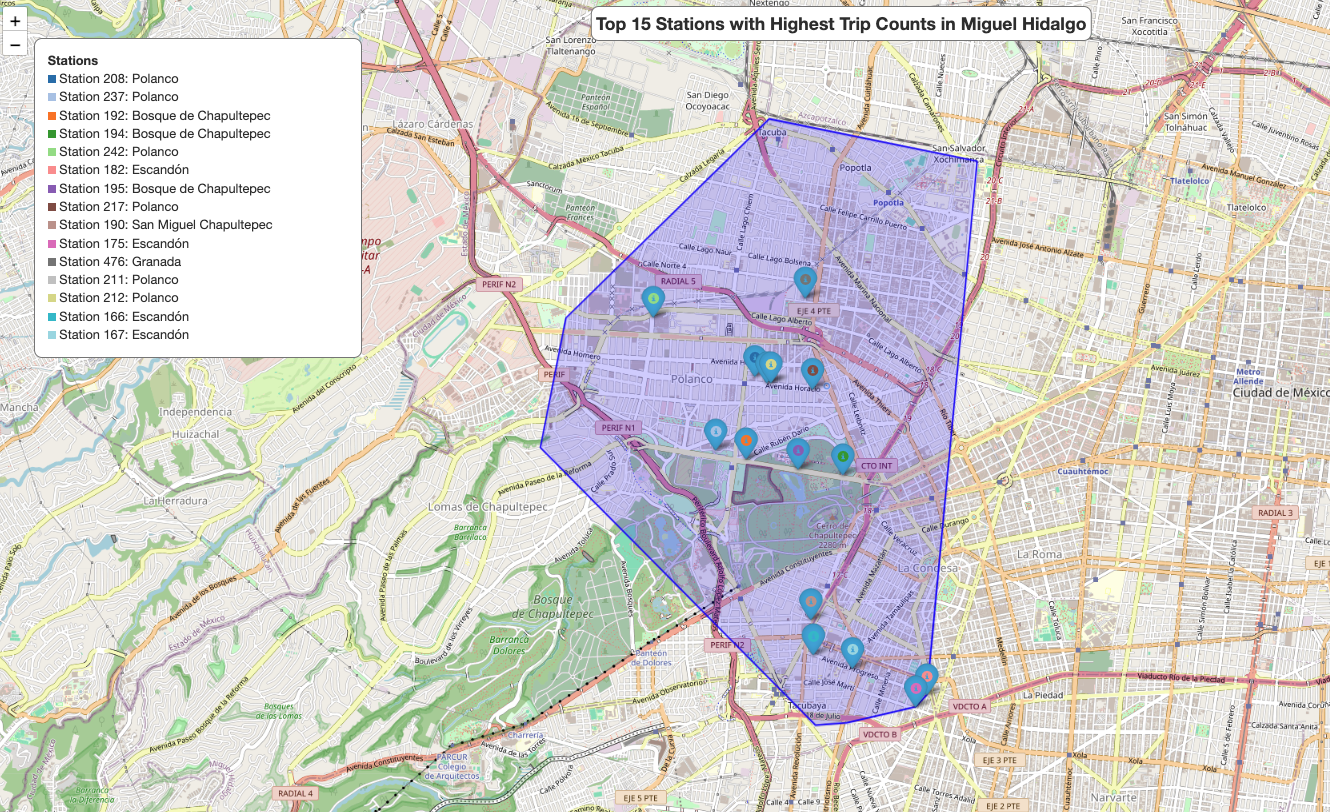

### Top stations for trip count are found on Paseo la Reforma which is a very busy avenue that connects to benito juarez
### Others are in the heart of Polanco on avenuda homera
### The rest are spread out in other areas of Polanco

In [ ]:
# Filter the data to include only female users
female_data = miguel_hidalgo_data[miguel_hidalgo_data['Gender'] == 'F']

# Group by 'Hour' and 'Colonia' and count the number of trips
trip_count_per_hour_colonia_female = female_data.groupby(['Hour', 'Colonia']).size().reset_index(name='Trip_Count')

# Get the top 3 colonias for each hour by trip count
top_3_colonias_per_hour = trip_count_per_hour_colonia_female.groupby('Hour').apply(lambda x: x.nlargest(3, 'Trip_Count')).reset_index(drop=True)

# Create a bar chart to visualize the number of trips by hour and colonia
fig = px.bar(top_3_colonias_per_hour, x='Hour', y='Trip_Count', color='Colonia', barmode='group',
             title='Top 3 Colonias with the Highest Number of Female Users per Hour in Miguel Hidalgo',
             labels={'Hour': 'Hour of the Day', 'Trip_Count': 'Number of Trips', 'Colonia': 'Colonia'})

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='Hour of the Day',
    yaxis_title='Number of Trips',
    xaxis_tickangle=-45,
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600  # Set the height of the chart
)

# Update x-axis ticks to show all hours from 0 to 23
fig.update_xaxes(tickmode='array', tickvals=list(range(24)))

# Show the plot
fig.show()

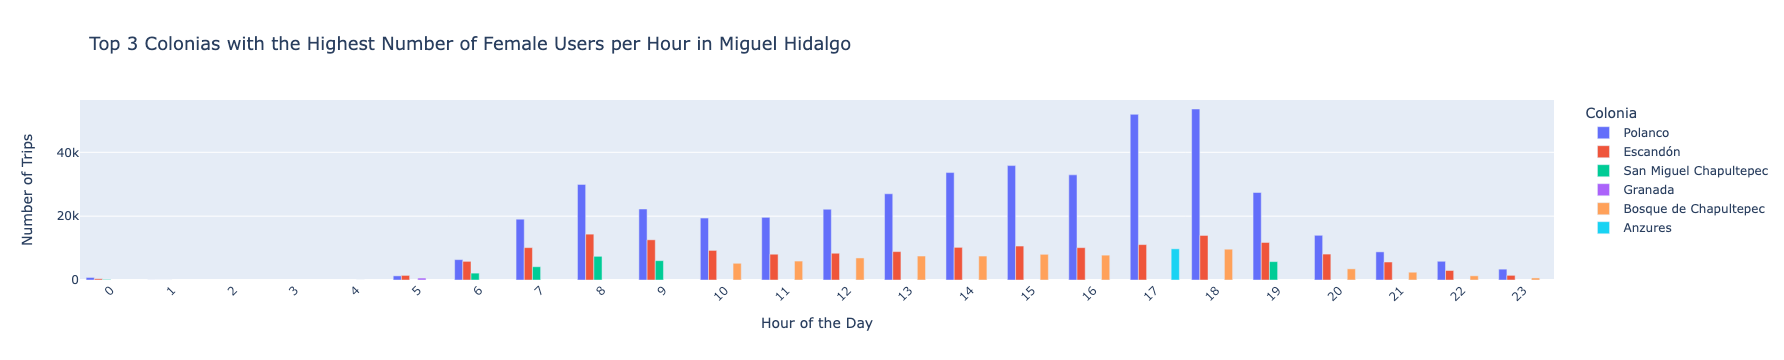

### Polanco peak hours are 8am, 3pm and 6pm for females 
### Escandon is 8am and 6pm
### San miguel Chapu is only busy between 6 - 9am and 7pm
### Bosque de Chapu starts at 10am 

In [ ]:
# Group by 'Hour' and 'Colonia' and calculate the average trip duration
avg_trip_duration_per_hour_colonia_female = female_data.groupby(['Hour', 'Colonia'])['Trip_Duration'].mean().reset_index(name='Avg_Trip_Duration')

# Get the colonia with the highest average trip duration for each hour
max_female_avg_trip_duration_per_hour = avg_trip_duration_per_hour_colonia_female.loc[avg_trip_duration_per_hour_colonia_female.groupby('Hour')['Avg_Trip_Duration'].idxmax()]

# Create a bar chart to visualize the average trip duration by hour and colonia
fig = px.bar(max_female_avg_trip_duration_per_hour, x='Hour', y='Avg_Trip_Duration', color='Colonia', barmode='group',
             title='Colonias with the Highest Average Trip Duration for Female Users per Hour in Miguel Hidalgo',
             labels={'Hour': 'Hour of the Day', 'Avg_Trip_Duration': 'Average Trip Duration (minutes)', 'Colonia': 'Colonia'})

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='Hour of the Day',
    yaxis_title='Average Trip Duration (minutes)',
    xaxis_tickangle=-45,
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600 # Set the height of the chart
)

# Update x-axis ticks to show all hours from 0 to 23
fig.update_xaxes(tickmode='array', tickvals=list(range(24)))

# Show the plot
fig.show()

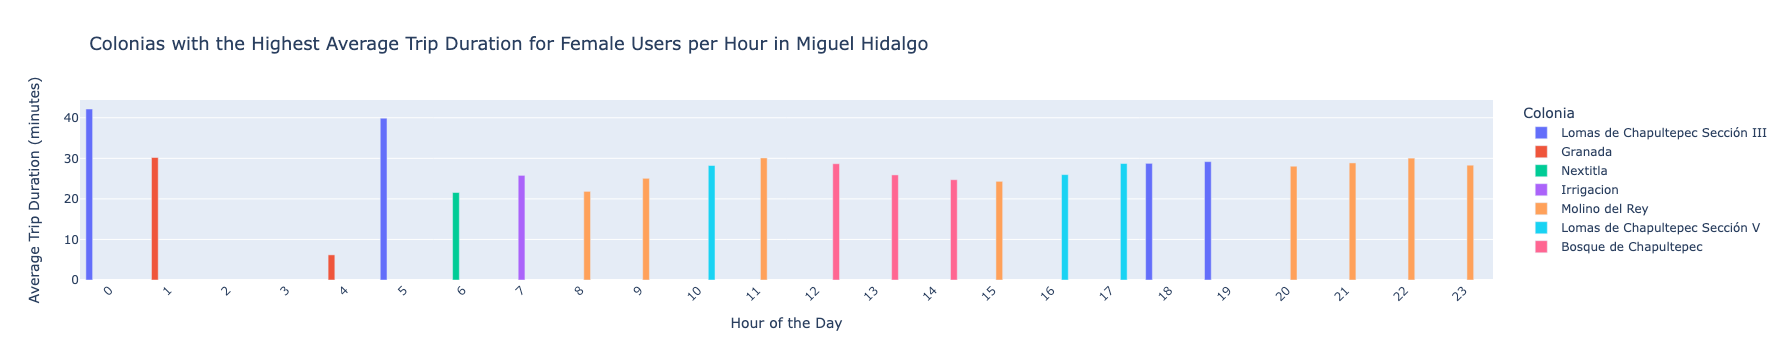

### Lomas de Chapultepec has a very high avg trip duration at midnight and 5am
### 7am shows irrigacion 
### Molino del rey for 8 and 9am
### bosque de Chapu between 12 and 2pm 
### lomas de chapu and molino del rey which are very close to each other lead after 4pm

In [ ]:
# Group by 'Hour' and 'Colonia' and count the number of trips
trip_count_per_hour_colonia_age_group = age_group_16_25_data.groupby(['Hour', 'Colonia']).size().reset_index(name='Trip_Count')

# Get the top 3 colonias for each hour by trip count
top_3_colonias_per_hour_age_group = trip_count_per_hour_colonia_age_group.groupby('Hour').apply(lambda x: x.nlargest(3, 'Trip_Count')).reset_index(drop=True)

# Create a bar chart using Plotly
fig = px.bar(top_3_colonias_per_hour_age_group, 
             x='Hour', 
             y='Trip_Count', 
             color='Colonia', 
             title='Top 3 Colonias with the Most Trips Taken by Users (Age 16-25) per Hour in Miguel Hidalgo',
             labels={'Hour': 'Hour of the Day', 'Trip_Count': 'Number of Trips', 'Colonia': 'Colonia'},
             barmode='group')

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='Hour of the Day',
    yaxis_title='Number of Trips',
    xaxis_tickangle=-45,
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the height of the chart
    bargap=0.15,  # Adjust the gap between bars for better visualization
    bargroupgap=0.1  # Adjust the gap between groups of bars
)

# Update x-axis ticks to show all hours from 0 to 23
fig.update_xaxes(tickmode='array', tickvals=list(range(24)))

# Show the plot
fig.show()

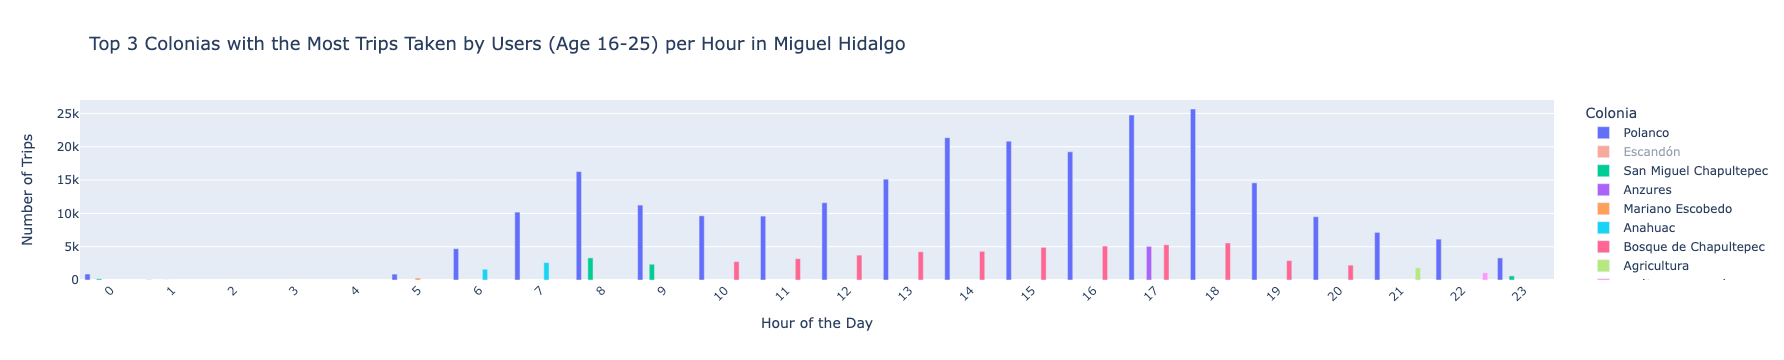

### 16-25 age group shows similar patterns with peaks at 8am, mid-day and 6pm
### polanco shows the most noticable fluctuations compared to escandon and bosque de chapu
### Anzures spikes at 5pm indicating after work rush hour

In [ ]:
# Group by 'Hour' and 'Colonia' and count the number of trips
trip_count_per_hour_colonia_age_group = age_group_26_35_data.groupby(['Hour', 'Colonia']).size().reset_index(name='Trip_Count')

# Get the top 3 colonias for each hour by trip count
top_3_colonias_per_hour_age_group = trip_count_per_hour_colonia_age_group.groupby('Hour').apply(lambda x: x.nlargest(3, 'Trip_Count')).reset_index(drop=True)

# Create a bar chart using Plotly
fig = px.bar(top_3_colonias_per_hour_age_group, 
             x='Hour', 
             y='Trip_Count', 
             color='Colonia', 
             title='Top 3 Colonias with the Most Trips Taken by Users (Age 26-35 ) per Hour in Miguel Hidalgo',
             labels={'Hour': 'Hour of the Day', 'Trip_Count': 'Number of Trips', 'Colonia': 'Colonia'},
             barmode='group')

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='Hour of the Day',
    yaxis_title='Number of Trips',
    xaxis_tickangle=-45,
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the height of the chart
    bargap=0.15,  # Adjust the gap between bars for better visualization
    bargroupgap=0.1  # Adjust the gap between groups of bars
)

# Update x-axis ticks to show all hours from 0 to 23
fig.update_xaxes(tickmode='array', tickvals=list(range(24)))

# Show the plot
fig.show()

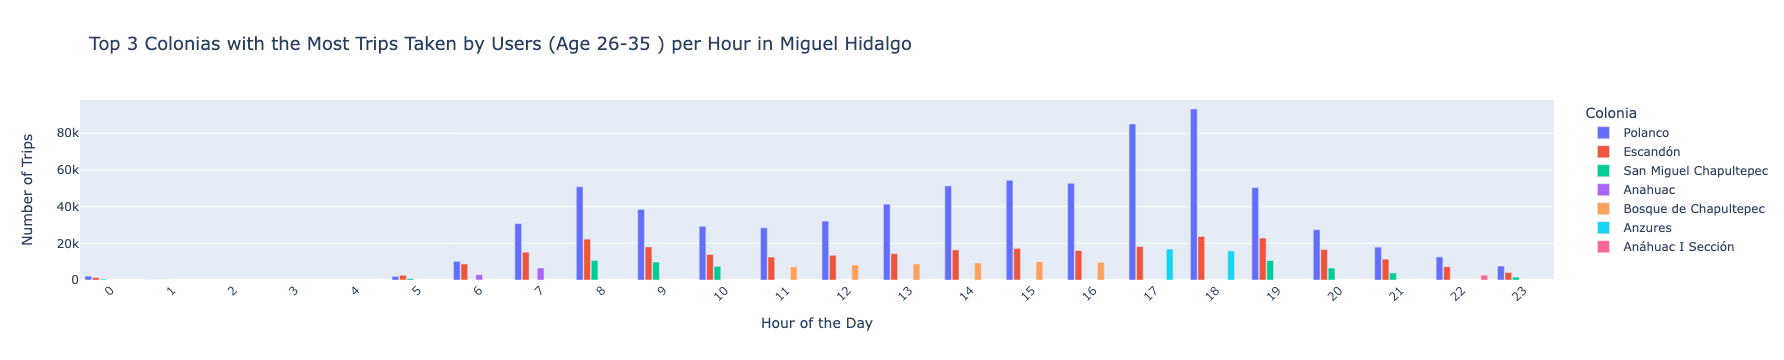

### this age group also shows similar patterns with peaks at 8am, mid-day and 6pm but escandon shows more noticable rush patterns as opposed to 16-25 age group 
### 8 - 10am and 7 - 10pm spikes for San Miguel de Chapultepec
### this age group reaches the highest amount of trips with 93k at 6pm

In [ ]:
# Group by 'Hour' and 'Colonia' and count the number of trips
trip_count_per_hour_colonia_age_group = age_group_36_45_data.groupby(['Hour', 'Colonia']).size().reset_index(name='Trip_Count')

# Get the top 3 colonias for each hour by trip count
top_3_colonias_per_hour_age_group = trip_count_per_hour_colonia_age_group.groupby('Hour').apply(lambda x: x.nlargest(3, 'Trip_Count')).reset_index(drop=True)

# Create a bar chart using Plotly
fig = px.bar(top_3_colonias_per_hour_age_group, 
             x='Hour', 
             y='Trip_Count', 
             color='Colonia', 
             title='Top 3 Colonias with the Most Trips Taken by Users (Age 36-45) per Hour in Miguel Hidalgo',
             labels={'Hour': 'Hour of the Day', 'Trip_Count': 'Number of Trips', 'Colonia': 'Colonia'},
             barmode='group')

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='Hour of the Day',
    yaxis_title='Number of Trips',
    xaxis_tickangle=-45,
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the height of the chart
    bargap=0.15,  # Adjust the gap between bars for better visualization
    bargroupgap=0.1  # Adjust the gap between groups of bars
)

# Update x-axis ticks to show all hours from 0 to 23
fig.update_xaxes(tickmode='array', tickvals=list(range(24)))

# Show the plot
fig.show()

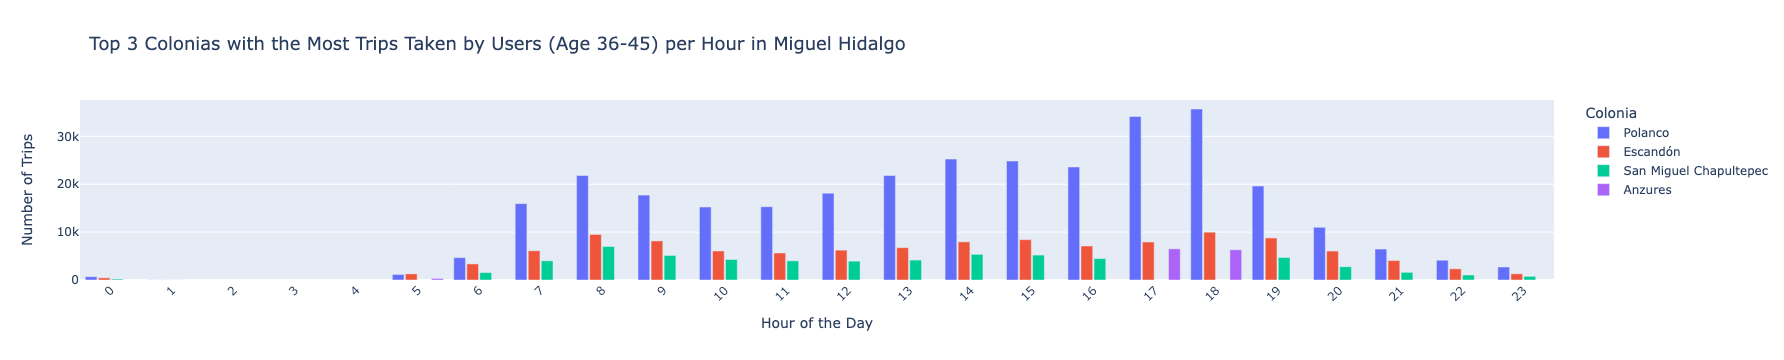

### 36 - 45 age group also shows very similar patterns as 26-35 age group but Bosque de Chapu is not prefered by this age group

In [ ]:
# Group by 'Hour' and 'Colonia' and count the number of trips
trip_count_per_hour_colonia_age_group = age_group_46_60_data.groupby(['Hour', 'Colonia']).size().reset_index(name='Trip_Count')

# Get the top 3 colonias for each hour by trip count
top_3_colonias_per_hour_age_group = trip_count_per_hour_colonia_age_group.groupby('Hour').apply(lambda x: x.nlargest(3, 'Trip_Count')).reset_index(drop=True)

# Create a bar chart using Plotly
fig = px.bar(top_3_colonias_per_hour_age_group, 
             x='Hour', 
             y='Trip_Count', 
             color='Colonia', 
             title='Top 3 Colonias with the Most Trips Taken by Users (Age 46-60) per Hour in Miguel Hidalgo',
             labels={'Hour': 'Hour of the Day', 'Trip_Count': 'Number of Trips', 'Colonia': 'Colonia'},
             barmode='group')

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='Hour of the Day',
    yaxis_title='Number of Trips',
    xaxis_tickangle=-45,
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the height of the chart
    bargap=0.15,  # Adjust the gap between bars for better visualization
    bargroupgap=0.1  # Adjust the gap between groups of bars
)

# Update x-axis ticks to show all hours from 0 to 23
fig.update_xaxes(tickmode='array', tickvals=list(range(24)))

# Show the plot
fig.show()

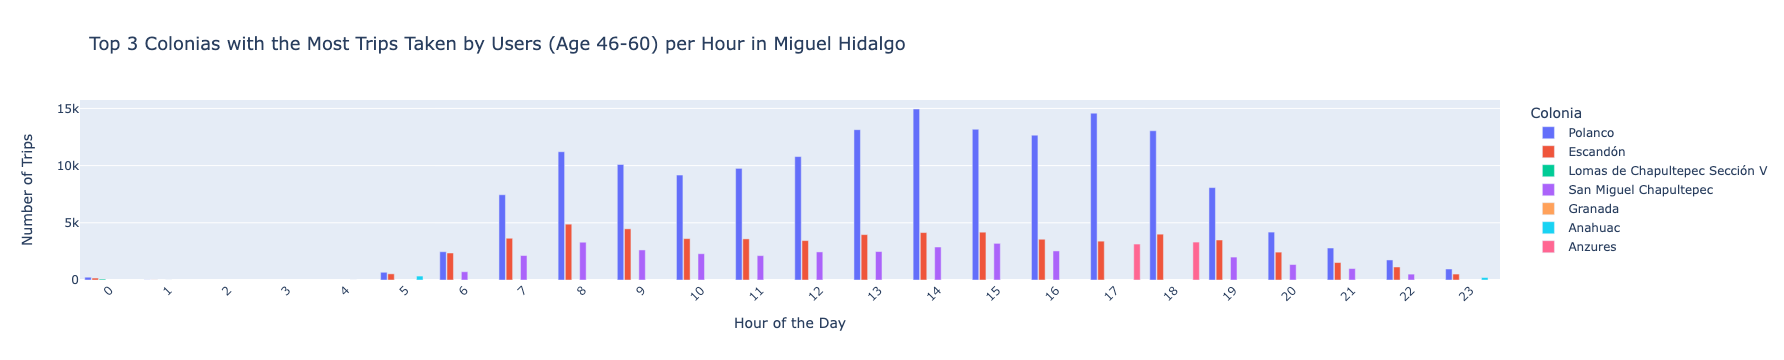

### 46-60 age group shows lower trips recorder per hour with the same rush hour peaks as the previous age groups but 2pm is the highest number recorded with 14.9k 

In [ ]:
# Group by 'Hour' and 'Colonia' and count the number of trips
trip_count_per_hour_colonia_age_group = age_group_61_99_data.groupby(['Hour', 'Colonia']).size().reset_index(name='Trip_Count')

# Get the top 3 colonias for each hour by trip count
top_3_colonias_per_hour_age_group = trip_count_per_hour_colonia_age_group.groupby('Hour').apply(lambda x: x.nlargest(3, 'Trip_Count')).reset_index(drop=True)

# Create a bar chart using Plotly
fig = px.bar(top_3_colonias_per_hour_age_group, 
             x='Hour', 
             y='Trip_Count', 
             color='Colonia', 
             title='Top 3 Colonias with the Most Trips Taken by Users (Age 61-99) per Hour in Miguel Hidalgo',
             labels={'Hour': 'Hour of the Day', 'Trip_Count': 'Number of Trips', 'Colonia': 'Colonia'},
             barmode='group')

# Customize the layout for better readability
fig.update_layout(
    xaxis_title='Hour of the Day',
    yaxis_title='Number of Trips',
    xaxis_tickangle=-45,
    title_font_size=18,
    xaxis_title_font_size=14,
    yaxis_title_font_size=14,
    height=600,  # Set the height of the chart
    bargap=0.15,  # Adjust the gap between bars for better visualization
    bargroupgap=0.1  # Adjust the gap between groups of bars
)

# Update x-axis ticks to show all hours from 0 to 23
fig.update_xaxes(tickmode='array', tickvals=list(range(24)))

# Show the plot
fig.show()

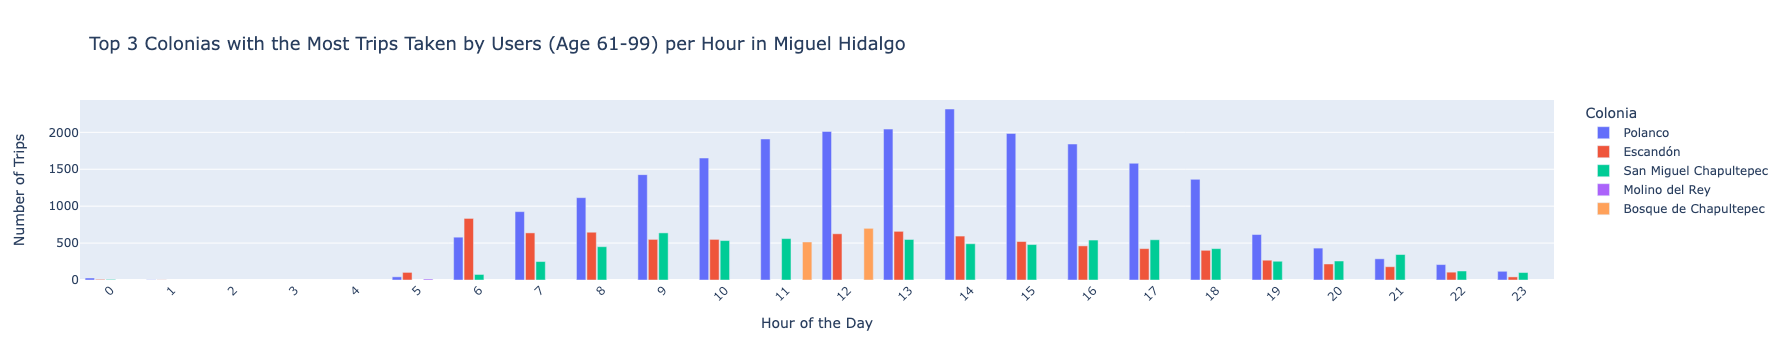

### the oldest age group does not follow the previous age group behavior 61-99
### activity fo this age group gradually increases until peaking at 2pm and dropping  until the end of the day
### escandon peaks at 6am and bossque de chapu peaks at 12pm
### san miguel peaks at 9am

# Key Observations:
## Trip Counts and Station Counts:

### -Polanco: Highest number of trips taken, leading by a large margin.
### -44 stations in Polanco.
### -Escandon: Second in trip count.
### -13 stations in Escandon.
### -Anahuac: Third in trip count.
### -10 stations in Anahuac.
### -High station count generally correlates with a high number of trips.

## Average Trip Duration:

# Polanco does not appear in the top 10 colonias for average trip duration.
### -Lomas de Chapultepec: Highest average trip duration, likely due to its location on the outskirts of Miguel Hidalgo.
### -Stations with high average trip durations are often located in parks or peripheral areas.

## Monthly Trends:

### -January to May: Highest trip counts.
### -Polanco consistently leads in trip counts.
### -Colonias like Lomas de Chapultepec and Molino del Rey have higher average trip durations.

## Age Group Trends:

### -Polanco: 26-35 age group leads in trips, followed by 36-45 and 16-25.
### -Other colonias: 16-25 age group is the second highest.
### -61-99 age group: Leads in trip duration in colonias like Nextila, Tacuba, and Lomas de Chapultepec.

## Gender Trends:

### -Males dominate trip counts by about half compared to females.
### -Bosque de Chapultepec: Highest percentage of female users (36.9%).
### -Most colonias have about 30% female users.
### -Age group 16-25 and 26-35 lead in female usage percentages in most colonias.

## Day of the Week Trends:

### -Sunday: High activity in parks like Bosque de Chapultepec.
### -Weekends: Higher percentage of trips by the 61-99 age group.
### -Weekdays: Higher percentages for some colonias, especially for 36-45 and 26-35 age groups.

## Recommendations to Increase Usage:
## Expand Bike Stations:

### -Add more stations in high-traffic areas like Bosque de Chapultepec, given its popularity on weekends.
### -Increase the number of docks rather than new stations in already well-serviced areas to accommodate peak times.
## Targeted Marketing:

### -Focus on female users in Bosque de Chapultepec and other areas with higher female usage to boost overall female ridership.
### -Tailor marketing campaigns to the 16-25 and 26-35 age groups, as they show consistent usage patterns.
## Age-Specific Initiatives:

### -Create programs or incentives for the 61-99 age group, especially for weekend trips.
### -Consider senior-friendly features and safety measures to encourage older riders.
## Commuter Focus:

### -Improve infrastructure and service during peak commuter hours (8 AM, mid-day, 6 PM) in Polanco and Escandon.
### -Address after-work rush hour needs, especially in areas like Anzures.
## Event and Leisure Promotion:

### -Promote biking events or guided tours in parks and peripheral areas on weekends to increase leisure trips.
### -Highlight scenic routes and parks like Bosque de Chapultepec to attract more users.
## Insights for Further Analysis:
### -Detailed analysis of station usage patterns during rush hours and weekends can provide insights for optimizing bike station placements.
### -Investigating demographic-specific preferences for trip durations and times can help tailor services and marketing strategies.
### -Analyzing the impact of weather and seasonal variations on trip patterns can guide future planning and promotions.